In [15]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.svm import LinearSVC
import pickle

In [2]:
df=pd.read_csv('preprocessed.csv')
X = df['lemma']
y = df['review_stars']

In [3]:
X_try=X.tolist()
X_try=np.array(X_try)
X_try=X_try.reshape(-1,1)

In [4]:
ros = RandomOverSampler(random_state=777)

In [5]:
X_ROS, y_ROS = ros.fit_resample(X_try, y)

In [6]:
X_train, x_test, Y_train, y_test = train_test_split(X_ROS,y_ROS,test_size=0.3,random_state=42)

In [7]:
newpipeline = Pipeline([('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()), 
    ('clf', LinearSVC())])

In [8]:
X_train= X_train.flatten()

In [9]:
x_test= x_test.flatten()

In [10]:
newpipeline.fit(X_train,Y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LinearSVC())])

In [11]:
print('Training set score: ' + str(newpipeline.score(X_train,Y_train)))
print('Test set score: ' + str(newpipeline.score(x_test,y_test)))

Training set score: 0.8113064450919433
Test set score: 0.7533652125825445


In [12]:
yhat=newpipeline.predict(x_test)

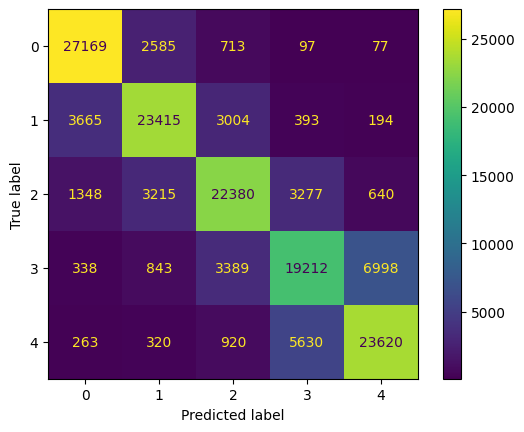

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(y_test, yhat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [14]:
print(metrics.classification_report(y_test, yhat))

              precision    recall  f1-score   support

           1       0.83      0.89      0.86     30641
           2       0.77      0.76      0.77     30671
           3       0.74      0.73      0.73     30860
           4       0.67      0.62      0.65     30780
           5       0.75      0.77      0.76     30753

    accuracy                           0.75    153705
   macro avg       0.75      0.75      0.75    153705
weighted avg       0.75      0.75      0.75    153705



In [16]:
with open('svc_oversample.pickle', 'wb') as f:
  pickle.dump(newpipeline, f)

In [19]:
with open('svc_oversample.pickle', 'rb') as f:
  loadedpipe = pickle.load(f)
testing=loadedpipe.predict(["This is a good restaurant, but the service is average"])
testing[0]

3

In [21]:
test_df=pd.DataFrame(
    data={
        'text' : X_ROS.flatten(),
        'stars' : y_ROS
    }
)

In [22]:
test_df.shape

(512350, 2)

In [ ]:
test_df.to_csv('oversampled_dataset.csv', index=False)